# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns
import json

#Linear modeling
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress



In [4]:
# Import API key
from api_keys import weather_api_key



In [5]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy



In [6]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
url = f"http://api.openweathermap.org/geo/1.0/direct?q={city}&appid={weather_api_key}"
response = requests.get(url)
print(response.status_code)

200


In [9]:
cities[0:5]

['rikitea', 'nuuk', 'novovasylivka', 'sampit', 'yulara']

In [10]:
data = response.json()
data

[{'name': 'Hasaki',
  'local_names': {'en': 'Hasaki', 'ja': '波崎'},
  'lat': 35.7529706,
  'lon': 140.8201321,
  'country': 'JP'}]

In [11]:
lat = data[0]["lat"]
lon = data[0]["lon"]
print(lat, lon)

35.7529706 140.8201321


In [12]:
url = f'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={weather_api_key}&units=imperial'
response = requests.get(url)
print(response.status_code)

200


In [13]:
data=response.json()
data

{'coord': {'lon': 140.8201, 'lat': 35.753},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 55.81,
  'feels_like': 55.13,
  'temp_min': 55.29,
  'temp_max': 56.21,
  'pressure': 1010,
  'humidity': 86,
  'sea_level': 1010,
  'grnd_level': 1010},
 'visibility': 10000,
 'wind': {'speed': 9.89, 'deg': 303, 'gust': 14.36},
 'clouds': {'all': 100},
 'dt': 1669472364,
 'sys': {'type': 1,
  'id': 7955,
  'country': 'JP',
  'sunrise': 1669411390,
  'sunset': 1669447495},
 'timezone': 32400,
 'id': 2112802,
 'name': 'Hasaki',
 'cod': 200}

In [14]:
response=requests.get(url)
print(response.status_code)

200


In [31]:
print(url)

http://api.openweathermap.org/geo/1.0/direct?q=yulara&appid=5a1e7b6b41dfe853ca12cf85a15b3692


In [32]:
# #run a test with small sample
# test=cities[0:5]

In [33]:
# #run a test with small sample
# rows = []

# for test in cities_sub:
#     print()
#     print(test)
#     row = {}
    
#     try:
    
#         # get the geocode, lat and long
#         url = f"http://api.openweathermap.org/geo/1.0/direct?q={city}&appid={weather_api_key}"
#         response = requests.get(url)

#         if (response.status_code == 200):
#             data = response.json()

#             # parse data
#             if (len(data) > 0):
#                 lat = data[0]["lat"]
#                 lon = data[0]["lon"]

#                 # make second request to get weather
#                 url2 = f'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={weather_api_key}&units=imperial'
#                 response2 = requests.get(url2)

#                 if (response2.status_code == 200):
#                     data2 = response2.json()

#                     # parse data
#                     weather = data2["weather"][0]["main"]
#                     temp = data2["main"]["temp"]
#                     humid = data2["main"]["humidity"]
#                     max_temp=data2["main"]["temp_max"]
#                     cloudiness=data2["clouds"]["all"]
#                     date=data2["dt"]
#                     wind_speed=data2["wind"]["speed"]
#                 else:
#                     print(f"Weather request failed for {city}")
#                     weather = None
#                     temp = np.nan
#                     humid = np.nan
#                     pressure = np.nan
#                     wind = np.nan

#                 # put into flat dictionary
#                 row["city"] = city
#                 row["lat"] = lat
#                 row["long"] = lon
#                 row["weather"] = weather
#                 row["temperature"] = temp
#                 row["humidity"] = humid
#                 row["temp_max"] = max_temp
#                 row["cloudiness"] = cloudiness
#                 row["date"] = date
#                 row["wind_speed"] = wind_speed
#                 # append to list
#                 rows.append(row)

#             else:
#                 print(f"no lat/long for {city}")
#                 pass
#         else:
#             print(f"failed request for geocode for {city}")
#             pass
#     except Exception as e:
#         print(e)
#         print(f"Oh no! Everything failed and broke for {city}. There should be an error above. Sux")
#         print()
        
#     # sleep
#     time.sleep(3)

In [41]:
rows = []

for city in cities:
    print()
    print(city)
    row = {}
    
    try:
    
        # get the geocode, lat and long
        url = f"http://api.openweathermap.org/geo/1.0/direct?q={city}&appid={weather_api_key}"
        response = requests.get(url)

        if (response.status_code == 200):
            data = response.json()

            # parse data
            if (len(data) > 0):
                lat = data[0]["lat"]
                lon = data[0]["lon"]

                # make second request to get weather
                url2 = f'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={weather_api_key}&units=imperial'
                response2 = requests.get(url2)

                if (response2.status_code == 200):
                    data2 = response2.json()

                    # parse data
                    weather = data2["weather"][0]["main"]
                    temp = data2["main"]["temp"]
                    humid = data2["main"]["humidity"]
                    max_temp=data2["main"]["temp_max"]
                    cloudiness=data2["clouds"]["all"]
                    date=data2["dt"]
                    wind_speed=data2["wind"]["speed"]
                else:
                    print(f"Weather request failed for {city}")
                    weather = None
                    temp = np.nan
                    humid = np.nan
                    pressure = np.nan
                    wind = np.nan

                # put into flat dictionary
                row["city"] = city
                row["lat"] = lat
                row["long"] = lon
                row["weather"] = weather
                row["temperature"] = temp
                row["humidity"] = humid
                row["temp_max"] = max_temp
                row["cloudiness"] = cloudiness
                row["date"] = date
                row["wind_speed"] = wind_speed
                # append to list
                rows.append(row)

            else:
                print(f"no lat/long for {city}")
                pass
        else:
            print(f"failed request for geocode for {city}")
            pass
    except Exception as e:
        print(e)
        print(f"Oh no! Everything failed and broke for {city}. There should be an error above. Sux")
        print()
        
    # sleep
    time.sleep(3)


rikitea

nuuk

novovasylivka

sampit

yulara

faya

derzhavinsk

nikolskoye

baruun-urt

puerto ayora

ouidah

la ronge

portland

busselton

ushuaia

port alfred

hithadhoo

bulungu

umzimvubu

heihe

tiksi

saint-philippe

jamestown

guerrero negro

leningradskiy

aksarka

faanui

upernavik

georgetown

meyungs
no lat/long for meyungs

vaini

bredasdorp

barbar

illoqqortoormiut

atuona

new norfolk

punta arenas

aklavik

yellowknife

vung tau

nong bua

torbay

bambous virieux

junction city

bedford

salalah

limerick

nago

oktyabrskiy

goa velha

vila velha

barrow

kropotkin

kirakira

butaritari

thinadhoo

port lincoln

codrington

limbang

geraldton

yomou

vanimo

ugoofaaru
no lat/long for ugoofaaru

half moon bay

pevek

hobart

waw

buala

port elizabeth

cherskiy
no lat/long for cherskiy

muli

taolanaro
no lat/long for taolanaro

harper

cape town

kapaa

tuktoyaktuk

qaqortoq

talesh

ilulissat

cabo san lucas

sao filipe

hermanus

yumen

castro

mehamn

havelock

pa

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [48]:
df = pd.DataFrame(rows)
df

,city,lat,long,weather,temperature,humidity,temp_max,cloudiness,date,wind_speed
0,rikitea,-23.122954,-134.968014,Clouds,73.94,77,73.94,68,1669472854,2.19
1,nuuk,64.175029,-51.735539,Clouds,29.97,74,30.92,75,1669472858,11.50
2,novovasylivka,47.922710,35.485840,Clouds,45.00,79,45.00,100,1669472863,7.70
3,sampit,-2.538911,112.949389,Clouds,74.68,96,74.68,100,1669472867,2.95
4,yulara,-25.241011,130.986941,Clouds,76.35,55,76.35,98,1669472871,3.58
...,...,...,...,...,...,...,...,...,...,...
590,luba,17.317322,120.694646,Clouds,73.99,93,73.99,82,1669475377,4.05
591,soyo,-6.133377,12.371755,Rain,77.83,85,77.83,97,1669475381,10.45
592,pochutla,17.660556,-98.897778,Clouds,71.91,63,71.91,98,1669475385,2.06
593,khonuu,66.455612,143.223007,Clouds,-28.05,90,-28.05,97,1669475388,2.01


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   city         595 non-null    object 
 1   lat          595 non-null    float64
 2   long         595 non-null    float64
 3   weather      595 non-null    object 
 4   temperature  595 non-null    float64
 5   humidity     595 non-null    int64  
 6   temp_max     595 non-null    float64
 7   cloudiness   595 non-null    int64  
 8   date         595 non-null    int64  
 9   wind_speed   595 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 46.6+ KB


In [56]:
df.corr()

,lat,long,temperature,humidity,temp_max,cloudiness,date,wind_speed
lat,1.000000,-0.086300,-0.703198,0.284634,-0.699031,0.178889,0.066229,-0.027719
long,-0.086300,1.000000,-0.118132,0.131926,-0.129007,0.119954,0.092739,-0.134520
temperature,-0.703198,-0.118132,1.000000,-0.491341,0.999114,-0.196648,-0.017105,0.084935
humidity,0.284634,0.131926,-0.491341,1.000000,-0.491871,0.386430,-0.012541,-0.128575
temp_max,-0.699031,-0.129007,0.999114,-0.491871,1.000000,-0.202831,-0.018432,0.084502
cloudiness,0.178889,0.119954,-0.196648,0.386430,-0.202831,1.000000,-0.017465,-0.031098
date,0.066229,0.092739,-0.017105,-0.012541,-0.018432,-0.017465,1.000000,-0.079713
wind_speed,-0.027719,-0.134520,0.084935,-0.128575,0.084502,-0.031098,-0.079713,1.000000


In [55]:
df.describe()

,lat,long,temperature,humidity,temp_max,cloudiness,date,wind_speed
count,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,5.950000e+02,595.000000
mean,22.241349,17.853626,52.354118,71.806723,52.836857,58.398319,1.669474e+09,7.937731
std,33.165999,87.925266,31.391471,22.765781,31.380765,39.509207,7.152885e+02,5.727706
min,-54.806116,-179.413096,-49.020000,6.000000,-49.020000,0.000000,1.669472e+09,0.000000
25%,-3.728230,-58.450854,35.585000,59.500000,36.350000,20.000000,1.669474e+09,3.520000
50%,27.929189,22.312647,59.540000,78.000000,60.220000,71.000000,1.669474e+09,6.690000
75%,49.770294,93.765549,77.340000,90.000000,77.390000,99.000000,1.669475e+09,11.085000
max,78.223156,178.680784,100.200000,100.000000,100.200000,100.000000,1.669475e+09,34.940000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [64]:
df1=df.loc[df["humidity"]>100]
df1

,city,lat,long,weather,temperature,humidity,temp_max,cloudiness,date,wind_speed


In [ ]:
#no city with humidity > 100

In [67]:
df.humidity.unique()

array([ 77,  74,  79,  96,  55,  20,  86,  76,  99,  65,  59,  73,  66,
        85,  91,  94,  92,  95,  78,  84,  44,  72,  89,  64,  51,  30,
        71,  46,  81,  98,  69,  93,  83,  61,  80,  90,  29,  87,  19,
        60,  57,  54,  58,  37,  67,  70,  22,  31,  12,  39,  97,  50,
        24, 100,  75,  52,  40,  35,  45,  17,  23,  11,  47,  48,  36,
        53,  26,  62,  49,  38,  33,  41,  88,  68,  82,  10,  28,  56,
        63,  34,  15,  13,  43,   6,  18,  27,   9,  25,  42], dtype=int64)

In [69]:
#  Get the indices of cities that have humidity over 100%.


In [70]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

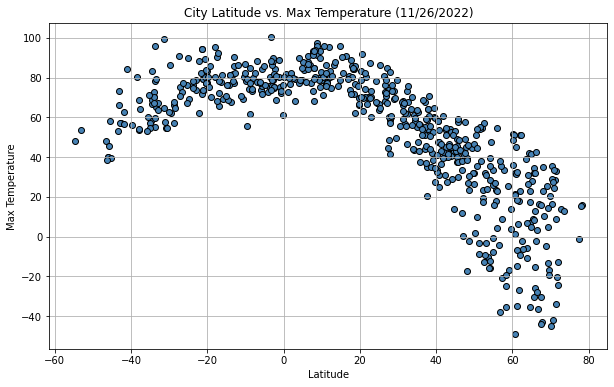

<Figure size 432x288 with 0 Axes>

In [94]:
# Scatter plot for all cities vs max. temp using latitude:
plt.figure(figsize=(10,6))
x=df["lat"].values
y=df["temp_max"].values

plt.title('City Latitude vs. Max Temperature (11/26/2022)')
plt.ylabel('Max Temperature')
plt.xlabel('Latitude')
plt.grid(True)

plt.scatter(x,y,edgecolors='black', color='steelblue')
plt.show()

#Save image
plt.savefig('Output/City Latitute vs Temp')


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   city         595 non-null    object 
 1   lat          595 non-null    float64
 2   long         595 non-null    float64
 3   weather      595 non-null    object 
 4   temperature  595 non-null    float64
 5   humidity     595 non-null    int64  
 6   temp_max     595 non-null    float64
 7   cloudiness   595 non-null    int64  
 8   date         595 non-null    int64  
 9   wind_speed   595 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 46.6+ KB


In [ ]:
#Analysis: this plot shows the max temp of cities depending where the cities are located. If they are towards the north hempshire, the temp seems lower. If they are more on the south hempshire, the temp seems higher.
#Analysis: this also shows a strong correlationship between lattitude and max temp when it is closer to the equator.

## Latitude vs. Humidity Plot

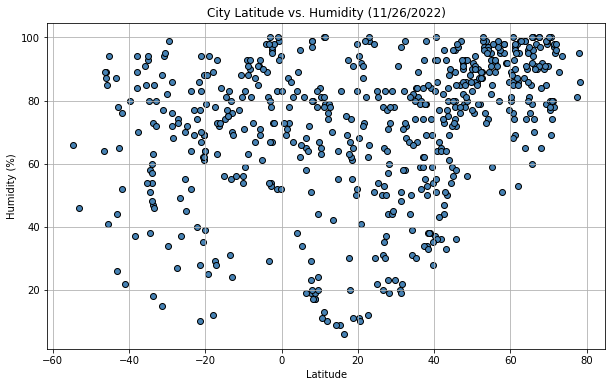

<Figure size 432x288 with 0 Axes>

In [96]:
# Scatter plot for all cities vs Humidity using latitude:
plt.figure(figsize=(10,6))
x=df["lat"].values
y=df["humidity"].values

plt.title('City Latitude vs. Humidity (11/26/2022)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

plt.scatter(x,y,edgecolors='black', color='steelblue')
plt.show()

#Save image
plt.savefig('Output/City Latitute vs Humidity')

In [ ]:
#Analysis: this plot shows there is no correlation between latitude and the humidity

## Latitude vs. Cloudiness Plot

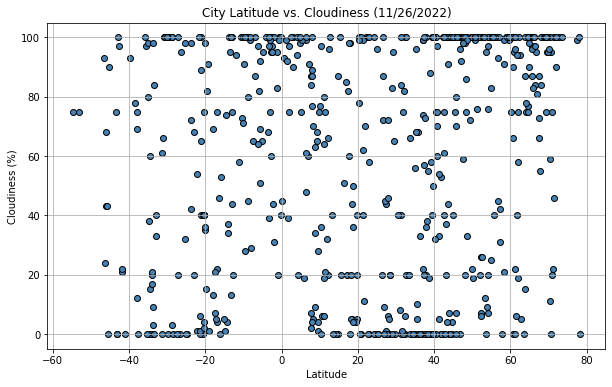

<Figure size 432x288 with 0 Axes>

In [97]:
# Scatter plot for all cities vs Cloudiness using latitude:
plt.figure(figsize=(10,6))
x=df["lat"].values
y=df["cloudiness"].values

plt.title('City Latitude vs. Cloudiness (11/26/2022)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

plt.scatter(x,y,edgecolors='black', color='steelblue')
plt.show()

#Save image
plt.savefig('Output/City Latitute vs Cloudiness')

In [ ]:
#Analysis: this plot shows there is no correlation between latitude and the cloudiness

## Latitude vs. Wind Speed Plot

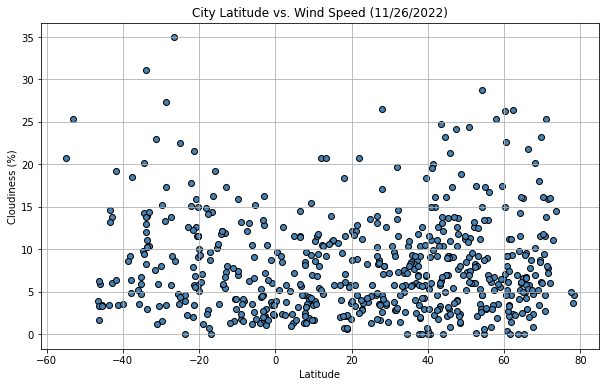

<Figure size 432x288 with 0 Axes>

In [98]:
# Scatter plot for all cities vs Cloudiness using latitude:
plt.figure(figsize=(10,6))
x=df["lat"].values
y=df["wind_speed"].values

plt.title('City Latitude vs. Wind Speed (11/26/2022)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

plt.scatter(x,y,edgecolors='black', color='steelblue')
plt.show()

#Save image
plt.savefig('Output/City Latitute vs Windspeed')

In [ ]:
#Analysis: this plot shows there is no correlation between latitude and the wind speed

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [133]:
#Northern Hemisphere city with Lat >0
north = df.loc[df["lat"]>0]
north

,city,lat,long,weather,temperature,humidity,temp_max,cloudiness,date,wind_speed
1,nuuk,64.175029,-51.735539,Clouds,29.97,74,30.92,75,1669472858,11.50
2,novovasylivka,47.922710,35.485840,Clouds,45.00,79,45.00,100,1669472863,7.70
5,faya,17.920932,19.095320,Clear,85.96,20,85.96,0,1669472954,18.41
6,derzhavinsk,51.099085,66.313852,Clouds,-3.03,86,-3.03,76,1669472958,11.27
7,nikolskoye,59.703480,30.786108,Clouds,13.91,86,13.91,99,1669472963,6.46
...,...,...,...,...,...,...,...,...,...,...
588,zugdidi,42.506762,41.871330,Rain,54.54,96,54.54,100,1669475370,11.10
590,luba,17.317322,120.694646,Clouds,73.99,93,73.99,82,1669475377,4.05
592,pochutla,17.660556,-98.897778,Clouds,71.91,63,71.91,98,1669475385,2.06
593,khonuu,66.455612,143.223007,Clouds,-28.05,90,-28.05,97,1669475388,2.01


In [135]:
north.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422 entries, 1 to 594
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   city         422 non-null    object 
 1   lat          422 non-null    float64
 2   long         422 non-null    float64
 3   weather      422 non-null    object 
 4   temperature  422 non-null    float64
 5   humidity     422 non-null    int64  
 6   temp_max     422 non-null    float64
 7   cloudiness   422 non-null    int64  
 8   date         422 non-null    int64  
 9   wind_speed   422 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 36.3+ KB


In [136]:
north.describe()

,lat,long,temperature,humidity,temp_max,cloudiness,date,wind_speed
count,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,4.220000e+02,422.000000
mean,39.916187,13.468899,43.830972,72.767773,44.419739,59.400474,1.669474e+09,7.725213
std,19.998961,83.581336,32.857932,23.388856,32.949918,40.101988,7.189747e+02,5.504379
min,0.123655,-179.413096,-49.020000,6.000000,-49.020000,0.000000,1.669472e+09,0.000000
25%,24.522951,-61.837582,25.975000,62.000000,26.267500,19.250000,1.669474e+09,3.532500
50%,41.339109,21.687753,46.510000,79.000000,47.555000,75.000000,1.669474e+09,6.680000
75%,55.809018,80.375862,70.270000,91.000000,70.575000,100.000000,1.669475e+09,10.540000
max,78.223156,172.918863,97.560000,100.000000,97.560000,100.000000,1.669475e+09,28.770000


The r-squared is: 0.7037719556828321


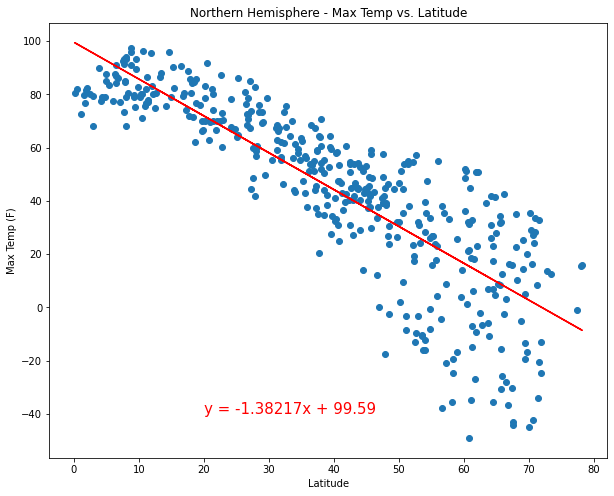

In [159]:
plt.figure(figsize = (10,8))

x_values = north["lat"]
y_values = north["temp_max"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,-40),fontsize=15,color="red")
plt.title('Northern Hemisphere - Max Temp vs. Latitude')


plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f"The r-squared is: {rvalue**2}")

#Save image
plt.savefig('Output/Northern Hemisphere - Max Temp vs Latitude')

plt.show()

In [ ]:
#Analysis: There is a strong negative correlation between latitude and maximum temperature on the Northern Hemisphere. The further from the equator the city is, the lower max temp of the city is 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [157]:
#South Hemisphere city with Lat <0
south= df.loc[df["lat"]<0]
south

,city,lat,long,weather,temperature,humidity,temp_max,cloudiness,date,wind_speed
0,rikitea,-23.122954,-134.968014,Clouds,73.94,77,73.94,68,1669472854,2.19
3,sampit,-2.538911,112.949389,Clouds,74.68,96,74.68,100,1669472867,2.95
4,yulara,-25.241011,130.986941,Clouds,76.35,55,76.35,98,1669472871,3.58
9,puerto ayora,-0.747167,-90.313420,Clouds,67.19,99,72.21,100,1669472972,5.99
13,busselton,-33.644499,115.348875,Clear,55.02,73,55.02,3,1669472987,13.96
...,...,...,...,...,...,...,...,...,...,...
565,benjamin aceval,-24.994723,-57.552444,Clear,89.62,45,89.62,0,1669475277,4.38
582,pandan,-3.287387,104.192984,Rain,73.60,98,73.60,100,1669475346,2.01
586,trairi,-3.277749,-39.268068,Clouds,88.27,54,88.27,97,1669475362,13.47
589,constitucion,-35.331831,-72.411900,Clear,71.26,54,71.26,0,1669475373,5.88


The r-squared is: 0.3443401234321705


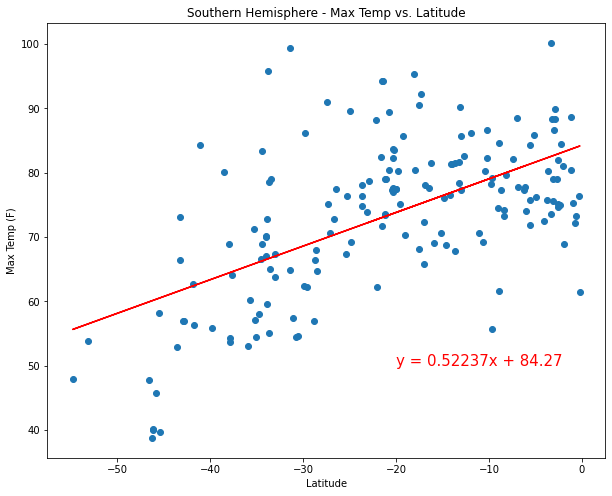

<Figure size 432x288 with 0 Axes>

In [172]:
plt.figure(figsize = (10,8))

x_values = south["lat"]
y_values = south["temp_max"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,50),fontsize=15,color="red")
plt.title('Southern Hemisphere - Max Temp vs. Latitude')


plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f"The r-squared is: {rvalue**2}")

plt.show()

#Save image
plt.savefig('Output/Southern Hemisphere - Max Temp vs Latitude')

In [ ]:
#Analysis: The plot shows a positive correlation between max temp and the latitude on the Southern Hemisphere. The closers to the equator the city is, the higher max temp of the city is.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.22430607892764562


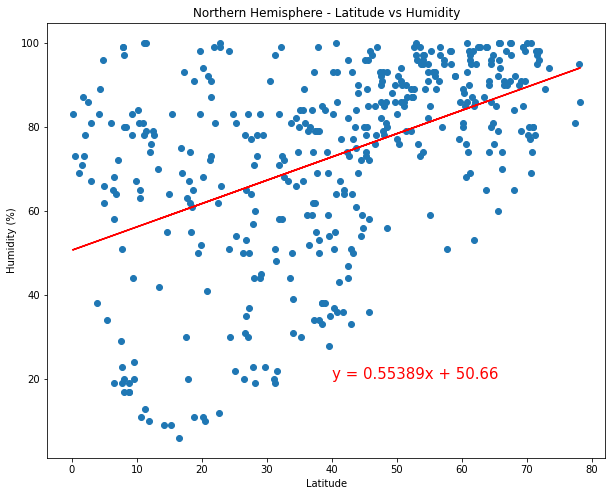

<Figure size 432x288 with 0 Axes>

In [179]:
plt.figure(figsize = (10,8))

x_values = north["lat"]
y_values = north["humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.title('Northern Hemisphere - Latitude vs Humidity')


plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")

plt.show()

#Save image
plt.savefig('Output/Northern Hemisphere - Latutide vs Humidity')

In [ ]:
#Analysis: The relationship between latitude and humidity is not very strong. The data scattered.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.039392320533054234


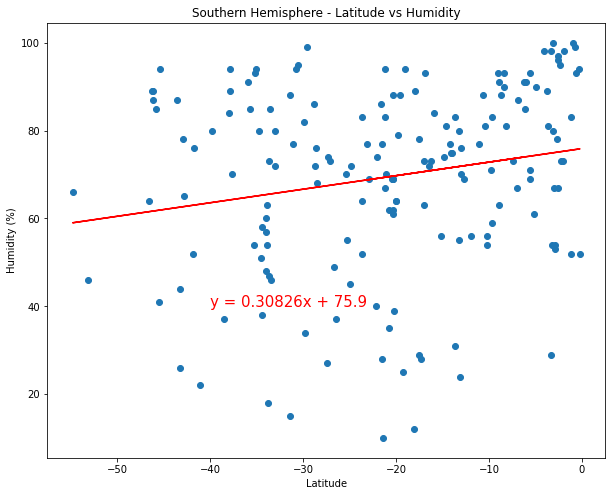

<Figure size 432x288 with 0 Axes>

In [178]:
plt.figure(figsize = (10,8))

x_values = south["lat"]
y_values = south["humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.title('Southern Hemisphere - Latitude vs Humidity')


plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")

plt.show()

#Save image
plt.savefig('Output/Southern Hemisphere - Latitude vs Humidity')

In [ ]:
#Analyis:The relationship between latitude and humidity is not very strong. The data scattered.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06763137506845253


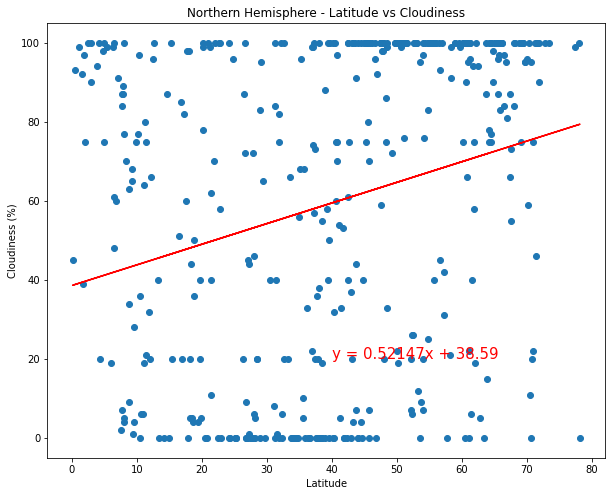

<Figure size 432x288 with 0 Axes>

In [184]:
plt.figure(figsize = (10,8))

x_values = north["lat"]
y_values = north["cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.title('Northern Hemisphere - Latitude vs Cloudiness')


plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")

plt.show()

#Save image
plt.savefig('Output/Northern Hemisphere - Latutide vs Cloudiness')

In [ ]:
#Analyis:The relationship between latitude and cloudiness is not very strong. The data scattered.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0842061536569706


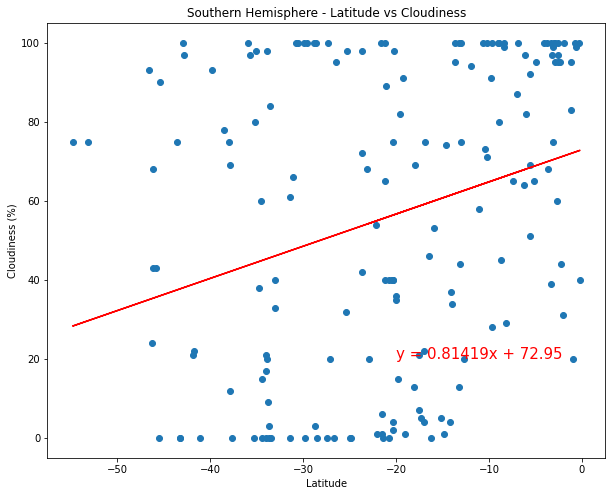

<Figure size 432x288 with 0 Axes>

In [183]:
plt.figure(figsize = (10,8))

x_values = south["lat"]
y_values = south["cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,20),fontsize=15,color="red")
plt.title('Southern Hemisphere - Latitude vs Cloudiness')


plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")

plt.show()

#Save image
plt.savefig('Output/Southern Hemisphere - Latutide vs Cloudiness')

In [ ]:
#Analyis:The relationship between latitude and cloudiness is not very strong. The data scattered.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.017074790082252593


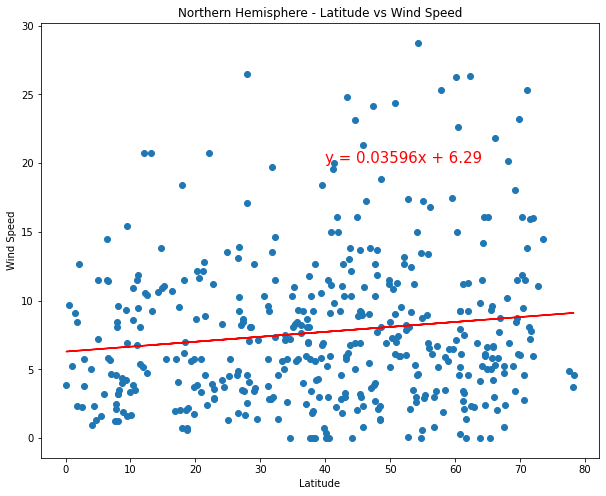

<Figure size 432x288 with 0 Axes>

In [185]:
plt.figure(figsize = (10,8))

x_values = north["lat"]
y_values = north["wind_speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.title('Northern Hemisphere - Latitude vs Wind Speed')


plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")

plt.show()

#Save image
plt.savefig('Output/Northern Hemisphere - Latutide vs Wind Speed')

In [ ]:
#Analyis:The relationship between latitude and windspeed is not very strong. The data scattered.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.06612978606834101


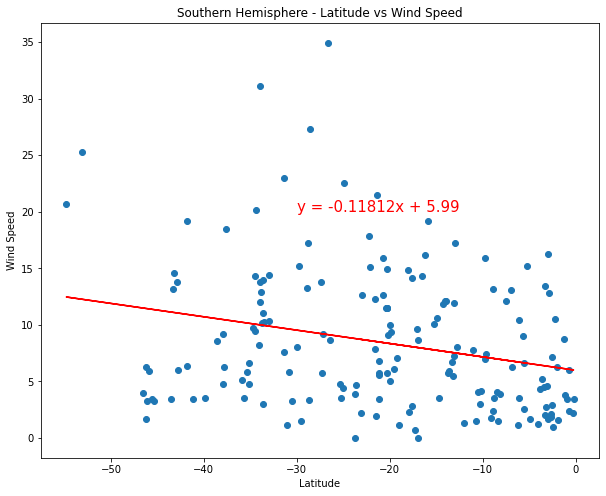

<Figure size 432x288 with 0 Axes>

In [187]:
plt.figure(figsize = (10,8))

x_values = south["lat"]
y_values = south["wind_speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.title('Southern Hemisphere - Latitude vs Wind Speed')


plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")

plt.show()

#Save image
plt.savefig('Output/Southern Hemisphere - Latutide vs Wind Speed')

In [ ]:
#Analyis:The relationship between latitude and windspeed is not very strong. The data scattered.

In [ ]:
#Analayis
#(1) The further from the equator the city is, the higher the max temp of the city is

#(2)  
#On the North Hamsphire, if the latitude is higher than 40, the humidity seems relatively high. If less than 20, the humidity scattered.
#On the Southern Hampshire, if the latitude is higher than -20, the humidity seems higher. If less than -20, the data scattered

#(3)There is no strong relationship between the latitude and the cloudiness  of the cities.
#(4)There is no strong relationship between the latitude and the windspeed  of the cities.
#On both hamsphires, most cities have windspeed less than 15mph

In [189]:
#export to csv
df.to_csv('Output/CityWeather.csv')

In [190]:
df

,city,lat,long,weather,temperature,humidity,temp_max,cloudiness,date,wind_speed
0,rikitea,-23.122954,-134.968014,Clouds,73.94,77,73.94,68,1669472854,2.19
1,nuuk,64.175029,-51.735539,Clouds,29.97,74,30.92,75,1669472858,11.50
2,novovasylivka,47.922710,35.485840,Clouds,45.00,79,45.00,100,1669472863,7.70
3,sampit,-2.538911,112.949389,Clouds,74.68,96,74.68,100,1669472867,2.95
4,yulara,-25.241011,130.986941,Clouds,76.35,55,76.35,98,1669472871,3.58
...,...,...,...,...,...,...,...,...,...,...
590,luba,17.317322,120.694646,Clouds,73.99,93,73.99,82,1669475377,4.05
591,soyo,-6.133377,12.371755,Rain,77.83,85,77.83,97,1669475381,10.45
592,pochutla,17.660556,-98.897778,Clouds,71.91,63,71.91,98,1669475385,2.06
593,khonuu,66.455612,143.223007,Clouds,-28.05,90,-28.05,97,1669475388,2.01
